# EDA : 911 Calls 

**Exploratory Data Analysis(EDA)** performed on Dataset  obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**note: this is a notebook to practice my data analysis , visualization and pandas skills . This was also a part of a capstone project of <a href="https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/">this</a> course.**

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [9]:
df["Reason"] = df['title'].apply(lambda x:x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [10]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now using seaborn to create a countplot of 911 calls by Reason.**

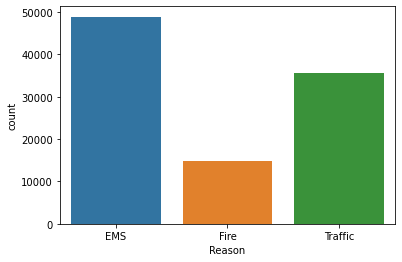

In [11]:
sns.countplot(x=df['Reason'],data = df)

*Here we can see that EMS clearly has a higher 911-call rate followed by Traffic and Fire.*

In [12]:
type(df['timeStamp'].iloc[0])

str

**using pd.to_datetime to convert the column from strings to DateTime objects.**

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'] )
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]



*Using .apply() to create 3 new columns called Hour, Month, and Day of Week . Creating these columns based off of the timeStamp column*

In [14]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['dow'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dow
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Notice how the Day of Week is an integer 0-6. Using the .map() with a dictionary to map the actual string names to the day of the week:**



In [15]:
dmap = {0:'Mon',1:'Tue',2:
       'Wed',3:'Thu',4:'Fir',5:'Sat',6:'Sun'}

In [16]:
df['dow'] = df['dow'].map(dmap)

In [17]:
df['dow']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: dow, Length: 99492, dtype: object

**Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

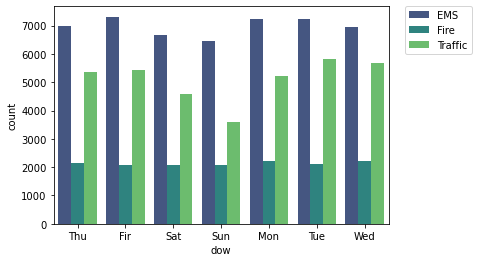

In [18]:
sns.countplot(x=df['dow'],hue = df['Reason'],palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*same for Month:*

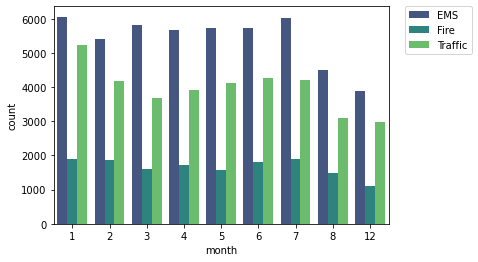

In [19]:
sns.countplot(x='month',data = df,hue='Reason',palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Months 9-11 are missing from this plot. Using groupby method to fix this issue**



In [20]:
byMonth = df.groupby('month').count()

In [21]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dow
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


*simple plot off of the dataframe indicating the count of calls per month:*

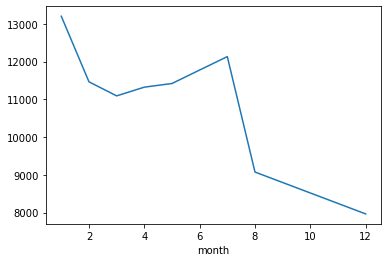

In [22]:
byMonth['twp'].plot()

*Here we see that there is a clear dip in 911-calls during months 7-12*

**Using seaborn's lmplot() to create a linear fit on the number of calls per month**

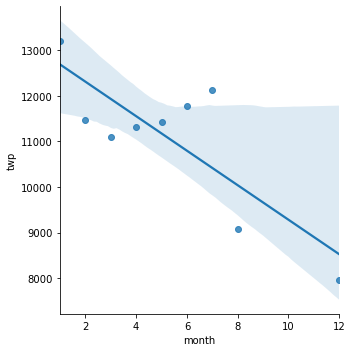

In [23]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [24]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())


*groupby this Date column with the count() aggregate and creating a plot of counts of 911 calls.*

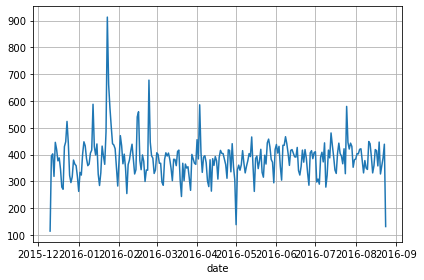

In [25]:
df.groupby('date').count()['twp'].plot()
plt.grid()
plt.tight_layout()

**recreating this plot with 3 separate plots with each plot representing a Reason for the 911 call**

In [46]:
df[df['Reason']=='Traffic'].groupby('date').count().sort_values(by='twp',ascending=False).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dow
date,,,,,,,,,,,,,
2016-01-23,557,557,557,464,557,557,557,531,557,557,557,557,557
2016-01-12,324,324,324,286,324,324,324,319,324,324,324,324,324
2016-02-24,309,309,309,266,309,309,309,300,309,309,309,309,309
2016-04-03,281,281,281,246,281,281,281,281,281,281,281,281,281
2015-12-23,277,277,277,218,277,277,277,272,277,277,277,277,277


*Here we observe that the date '2016-01-23' has the highest count of 911-calls , aslo confirmed by the following plot*	

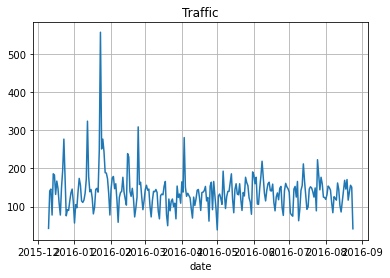

In [26]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.grid()

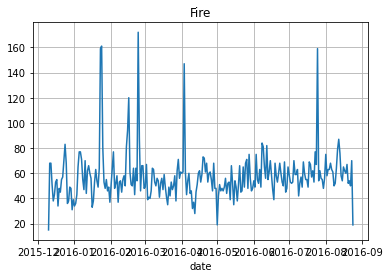

In [27]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.grid()

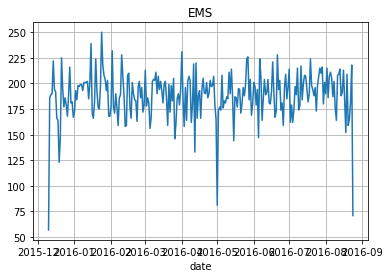

In [28]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.grid()

**Creating heatmaps : using unstack() method to create a matrix which acts as an input to the heatmap.**

In [29]:
dayhour = df.groupby(by=['dow','hour']).count()['Reason'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
Fir,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


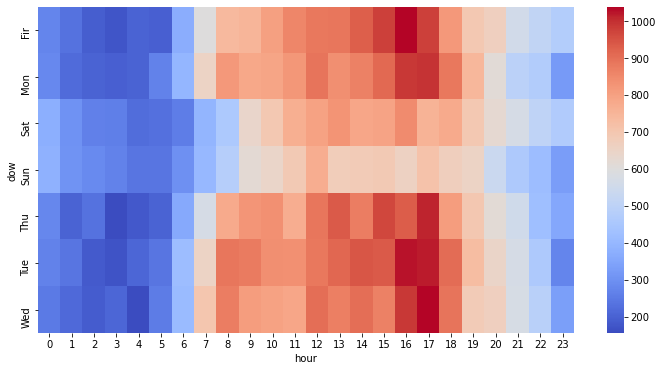

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='coolwarm')

*Here we obeserve that most 911-calls are during 8am-6pm , with sundays having the least amount of activity*

**clustermap using this DataFrame.**

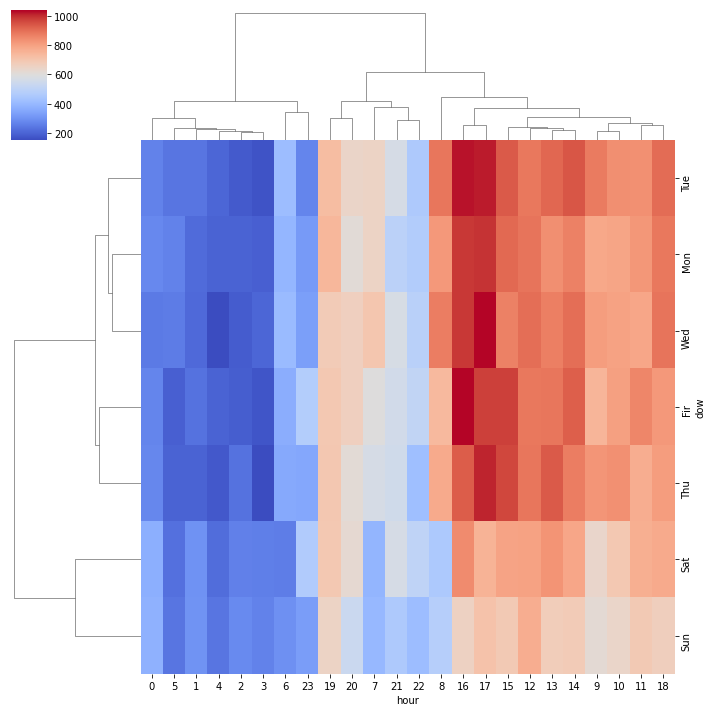

In [35]:
sns.clustermap(dayhour,cmap='coolwarm')

**Observation:**
* high amount of calls: Monday - Friday between 12pm-4pm
* lowest amount of calls: Saturday - Sunday

**Using Month as the column.**

In [32]:
daymonth = df.groupby(by = ['dow','month']).count()['Reason'].unstack()

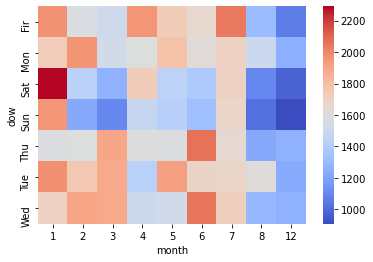

In [38]:
sns.heatmap(daymonth,cmap='coolwarm')

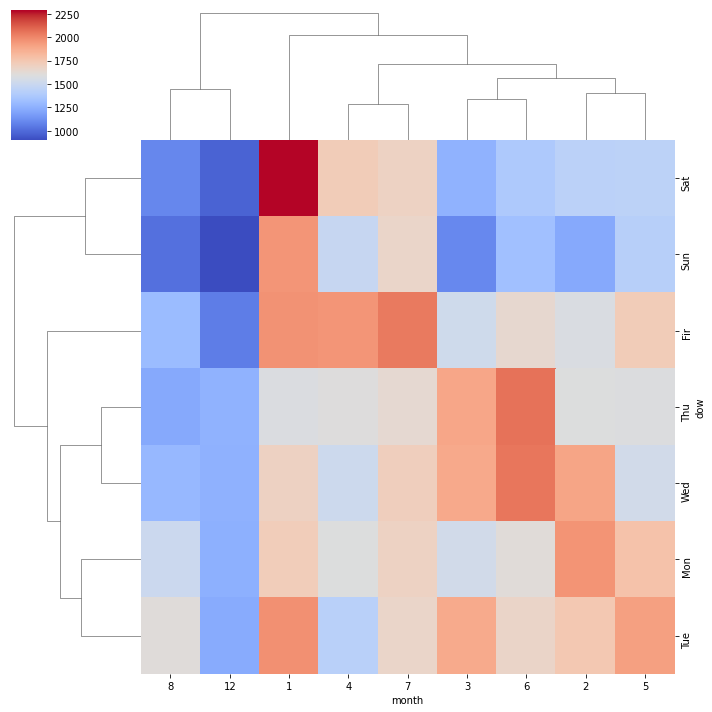

In [36]:
sns.clustermap(daymonth,cmap='coolwarm')

**This is the end of the initial Exploratory Data Analysis(EDA) on 911-calls dataset.
Will continue to update this notebook as my study in Data Science progresses.**